## Atividade prática 10

> Considere pelo menos um dos seguintes algoritmos: <br>
> - Decomposição LU (com o algoritmo de Crout-Dolittle).
> - Resolução de sistema triangular superior seguida de sistema triangular inferior.
> - Resolução de sistema linear por eliminação Gaussiana
> - ★ Resolução de sistema linear pelo método de Gauss-Seidel ou de Jacobi.
> - Cálculo de determinante por escalonamento
> - Cálculo de determinante por expansão de Laplace <br><br>
> Realize vários testes com inputs de diferentes tamanos para o algoritmo que você escolheu. Grave o tempo que o algoritmo leva para ser realizado e crie um gráfico. Faça uma regressão, utilizando um tipo apropriado de função, para dar uma estimativa empírica do <br>
>(Observação: Não há fórmula assintótica para o método de Gauss-Seidel em geral. Normalmente o tempo de execução é menor do que $O(n^2)$.) <br>
> Utilize a biblioteca matplotlib para criar gráficos. Você pode utilizar a biblioteca tqdm para exibir uma barra de carregamento nos seus laços.

In [50]:
import numpy as np
import time
import matplotlib.pyplot as plt
from tqdm import tqdm

In [51]:
def solve_determinante (A):
    '''Resolve o determinante por escalonamento
    
    Parâmetros obrigatórios
    ---------------------------
    A : Array-like de dimensao 2
        Matriz quadrada
    
    Saída
    ---------------------------
    det : float
          Determinante da matriz recebida
    '''
    n = len(A)

    # Escalonando a matriz
    for i in range(0, n):
        for j in range(i+1, n):
            coef = A[j, i]/A[i,i]
            
            A[j][:] -= coef * A[i][:]

    out = 1
    for i in range(n):
        out *= A[i, i]

    return out

In [52]:
ordem = 10

A = (np.random.randint(1, 10, (ordem,ordem))).astype(float)

determinante = solve_determinante(A)
print(f"Determinante calculado: ", determinante)
print(f"Determinante esperado: ", np.linalg.det(A))

Determinante calculado:  -147925959.9999993
Determinante esperado:  -147925959.99999985


In [53]:
ordem_max = 10

tabela = [[], []]
aux = True

for tam in tqdm(range(2,ordem_max)):
    aux = True

    while aux:
        A = (np.random.randint(-10, 10, (tam,tam))).astype(float)

        try:
            time_inicio = time.time()
            for i in range(10):
                determinante = solve_determinante(A)
            time_final = time.time()
            aux = False
            tabela[0].append(tam)
            tabela[1].append((time_final-time_inicio)/10)

        except:
            pass

  0%|          | 0/8 [00:00<?, ?it/s]C:\Users\Windows 10\AppData\Local\Temp\ipykernel_3136\2398402775.py:19: RuntimeWarning: divide by zero encountered in double_scalars
  coef = A[j, i]/A[i,i]
C:\Users\Windows 10\AppData\Local\Temp\ipykernel_3136\2398402775.py:21: RuntimeWarning: invalid value encountered in multiply
  A[j][:] -= coef * A[i][:]
C:\Users\Windows 10\AppData\Local\Temp\ipykernel_3136\2398402775.py:25: RuntimeWarning: invalid value encountered in double_scalars
  out *= A[i, i]
100%|██████████| 8/8 [00:00<00:00, 572.92it/s]


Para realizar a aproximação por mínimos quadrados, vamos fazer as seguintes considerações:
- $n$: ordem da matriz a ser calculada
- $a_k$: o coeficiente da equação de aproximação
- $t_n$: tempo para solucão da matriz $n$ x $n$ 


Além disso, o seguinte sistema representa as operações realizadas para descobrir os coeficientes da equação:

$\begin{bmatrix}
1 & 2 & 2^2 & ... & 2^k\\
1 & 3 & 3^2 & ... & 3^k\\
\vdots & \vdots & \vdots\\
1 & n & n^2 & ... & n^k\end{bmatrix}$ 
$\begin{bmatrix}
a_0\\
a_1\\
\vdots\\
a_k
\end{bmatrix}$ =
$\begin{bmatrix}
t_2\\
t_3\\
\vdots\\
t_n
\end{bmatrix}$


${\begin{bmatrix}
1 & 2 & 2^2 & ... & 2^k\\
1 & 3 & 3^2 & ... & 3^k\\
\vdots & \vdots & \vdots\\
1 & n & n^2 & ... & n^k\end{bmatrix}}^T$
$\begin{bmatrix}
1 & 2 & 2^2 & ... & 2^k\\
1 & 3 & 3^2 & ... & 3^k\\
\vdots & \vdots & \vdots\\
1 & n & n^2 & ... & n^k\end{bmatrix}$ 
$\begin{bmatrix}
a_0\\
a_1\\
\vdots\\
a_k
\end{bmatrix}$ = ${\begin{bmatrix}
1 & 2 & 2^2 & ... & 2^k\\
1 & 3 & 3^2 & ... & 3^k\\
\vdots & \vdots & \vdots\\
1 & n & n^2 & ... & n^k\end{bmatrix}}^T$
$\begin{bmatrix}
t_2\\
t_3\\
\vdots\\
t_n
\end{bmatrix}$

In [54]:
def solve_triangular_superior(U, b):
    n = U.shape[0]          # Ordem das matrizes

    x = b.copy()
                        
    for i in range(n-1,-1,-1):
        x[i] /= U[i,i]     # Normaliza a i-ésima linha
        for j in range(i-1,-1,-1):
            x[j] -= U[j,i]*x[i]     # Pivoteia a i-ésima coluna, utilizando a entrada diagonal como pivô

    return x

In [55]:
def f(a, x):
    out = 0
    for i in range(len(a)):
        out += a[i] * (x**i)

[[2 2 2]
 [3 3 3]
 [4 4 4]
 [5 5 5]
 [6 6 6]
 [7 7 7]
 [8 8 8]
 [9 9 9]]
[[284. 284. 284.]
 [284. 284. 284.]
 [284. 284. 284.]]
n:  3
(1, 0)
(2, 0)
(2, 1)
[nan, nan, nan, 0.0002991676330566406, 9.963512420654296e-05, 9.970664978027343e-05, 0.0002994060516357422, 0.00029923915863037107]


C:\Users\Windows 10\AppData\Local\Temp\ipykernel_3136\1693504634.py:25: RuntimeWarning: invalid value encountered in double_scalars
  coef = N[j, i]/N[i,i]


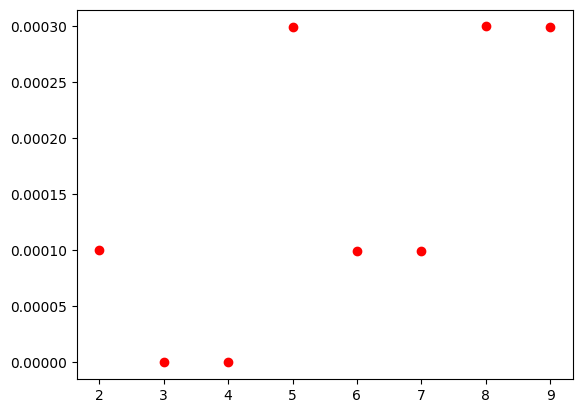

In [56]:
k = 2
t = tabela[1][:]
a = np.zeros(k+1)

T = []
for i in range(k+1):
    T.append(tabela[0][:])

T = np.transpose(T)

print(T)

N = (np.transpose(T) @ T).astype(float)
b = np.transpose(T) @ t

# N@a = b
print(N)

n = len(N)
print("n: ", n)
# Escalonando a matriz
for i in range(0, n):
    for j in range(i+1, n):
        print(f"({j}, {i})")
        coef = N[j, i]/N[i,i]
        
        N[j][:] -= coef * N[i][:]


# Com a matriz N escalonada, vamos calcular a matriz dos coeficientes
a = solve_triangular_superior(N, t)

print(a)

plt.plot(tabela[0], tabela[1],'ro')

dom = np.linspace(2, ordem_max, 1000)
im = []
for x in dom:
    im.append(f(a, x))

plt.plot(dom, im,'r')
plt.show()